# Transforming Continuous and Categorical Data

<img src='Data/TypesOfData.png' width=500/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
np.set_printoptions(precision=3)

In [3]:
diabetes = pd.read_csv('Data/diabetes_processed.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.00000,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.00000,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,29.15342,269.881846,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.00000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,29.15342,127.148895,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.00000,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,29.15342,135.878919,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.00000,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,29.15342,154.880154,32.0,0.232,54.0,1


In [4]:
features = diabetes.drop('Outcome', axis=1)
label = diabetes['Outcome']
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,269.881846,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [5]:
features.shape

(768, 8)

In [6]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.153420,152.610726,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.790942,97.200589,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-17.259478,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,130.755116,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.338974,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Observations:
We note that the features are of different ranges:
- Pregnancies are 0 through 17
- Glucose varies from 44 through 199
- BloodPressure varies from 24 through 122
- SkinThickness varies from 7 through 99
- Insulin varies from -17 through 846
- BMI varies from 18 through 67
- DiabetesPedigreeFunction varies from 0 through 2.42
- Age varies from 21 through 81

__Processing Numeric Data__

<img src='Data\NumericData.png' width=500/>

__Feature Scaling using MinMaxScaler__

This brings down values of features to the __min and max__ that we specify.

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Bring all the features on to single scale of 0 through 1

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(features)
rescaled_features = pd.DataFrame(rescaled_features, columns=features.columns)
rescaled_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.273716,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.101477,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240798,0.332625,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.128883,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.214605,0.509202,0.943638,0.200000


In [9]:
rescaled_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.240798,0.196778,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.095554,0.112597,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.124222,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.240798,0.171460,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239324,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
We can note that the __features__ are rescaled so that the __min and max__ are now __0 and 1__ respectively.

Note: <font color=red>Rescaling is very sensitive to the outliers present in our data.</font><br/>
Watch the boxplot diagram.

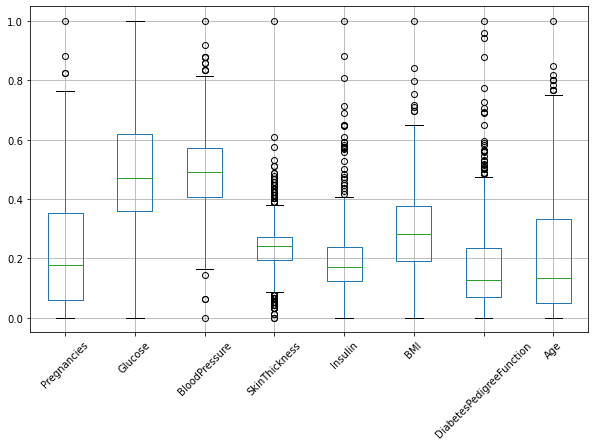

In [10]:
rescaled_features.boxplot(figsize=(10, 6), rot=45)

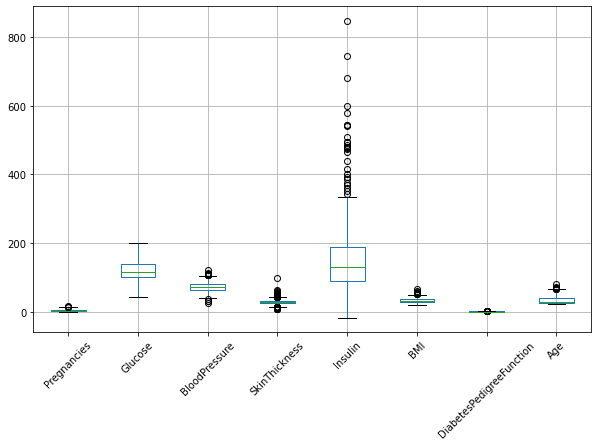

In [11]:
# Original features with outliers (before min-max scaling)

features.boxplot(figsize=(10, 6), rot=45)

__Feature Scaling using StandardScaler__

This will transform values of features such that the __mean is 0__ and __standard deviation is 1__. This is also known as __z score__ conversion. $ z = \frac {(x - x')}{mu} $ 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Bring all the features such that mean is 0 and standard deviation is 1

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)
standardized_features = pd.DataFrame(standardized_features, columns=features.columns)
standardized_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,6.655021e-01,0.683751,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-1.746338e-02,-0.846937,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,8.087936e-16,1.207272,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-7.004289e-01,-0.603380,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,6.655021e-01,0.158428,1.549885,5.484909,-0.020496


In [14]:
standardized_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,-4.325244e-16,7.956598e-16,-1.711594e-16,4.672189e-16,2.498002e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.521670e+00,-1.748764e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-4.727737e-01,-6.448061e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,8.087936e-16,-2.249971e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,3.240194e-01,3.781066e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.950467e+00,7.138240e+00,5.042883e+00,5.883565e+00,4.063716e+00


Observations:
We note that the __mean is 0__ and __standard deviation is 1__.

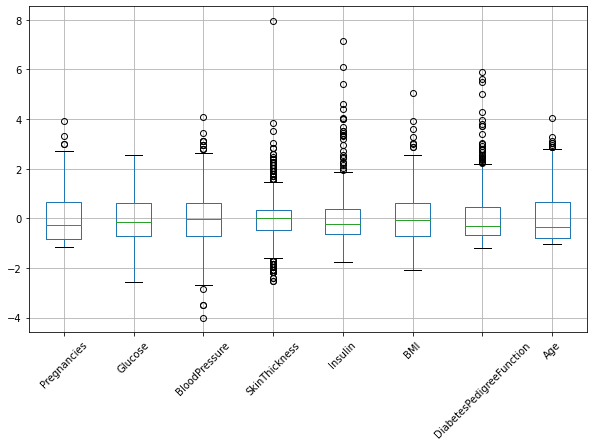

In [15]:
standardized_features.boxplot(figsize=(10, 6), rot=45)

Observations:
- Mean of features is 0
- __Center line__ in the __box__ is __Median__ and it is also close to the mean __unless the feature has lot of outliers__.

__Feature <font color=red>Vector</font> Transformation by Normalization__

- There are several kinds of normalizations like __L1, L2 and Max Norms__. 
- These are __horizontal vector__ normalizations, unlike the two we discussed above viz., MinMax or Standard scaling techniques; they are __vertical__ normalizations.


- This normalization technique makes the __magnitude__ of the __vector__ to be __1__.
- Sum of normalized values of L1 = 1
- Sum of squared normalized values of L2 = 1

In [16]:
from sklearn.preprocessing import Normalizer

__L1 Normalization__

In [17]:
normalizer = Normalizer(norm='l1')

L1_normalized_features = normalizer.fit_transform(features)
L1_normalized_features = pd.DataFrame(L1_normalized_features, columns=features.columns)
L1_normalized_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.010633,0.262293,0.127602,0.062029,0.388172,0.059548,0.001111,0.088612
1,0.003233,0.274821,0.213390,0.093762,0.227427,0.086003,0.001135,0.100229
2,0.013115,0.299996,0.104917,0.047792,0.442424,0.038196,0.001102,0.052458
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [18]:
# Sum of values of 1st vector (row = 1)

L1_normalized_features.iloc[0].sum()

1.0

__L2 Normalization__

In [19]:
normalizer = Normalizer(norm='l2')

L2_normalized_features = normalizer.fit_transform(features)
L2_normalized_features = pd.DataFrame(L2_normalized_features, columns=features.columns)
L2_normalized_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.021220,0.523417,0.254635,0.123781,0.774616,0.118830,0.002217,0.176830
1,0.007247,0.616013,0.478316,0.210169,0.509780,0.192776,0.002544,0.224664
2,0.023809,0.544627,0.190471,0.086764,0.803197,0.069343,0.002000,0.095235
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [20]:
# Sum of squares of values of 1st vector (row = 1)

L2_normalized_features.iloc[0].pow(2).sum()

1.0

__Max Normalization__

In [21]:
normalizer = Normalizer(norm='max')

normalized_features = normalizer.fit_transform(features)
normalized_features = pd.DataFrame(normalized_features, columns=features.columns)
normalized_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029643,0.678075,0.237141,0.108023,1.000000,0.086334,0.002490,0.118570
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


Observations:
- One __feature__ in __every vector__ will be __1__ and the __remaining values__ of the vector will be __expressed__ in terms of __this__.

__Binarizing Features__
- We can transform the feature values to a two state values like 0 and 1.

In [22]:
from sklearn.preprocessing import Binarizer

In [23]:
binarizer = Binarizer(threshold=float(features['Pregnancies'].mean()))
binarized_pregnancies = binarizer.fit_transform(features[['Pregnancies']])
binarized_pregnancies.T

array([[1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 

Observation:
- We can see the values of feature __Pregnancies__ converted to binary __1 or 0__ indicating the subject under investigation had a __pregenancy or not__.

In [24]:
# Let us binarizes every feature to transform their values to 0 or 1
binarized_features = pd.DataFrame()
for i in range(1, features.shape[1]):
    binarizer = Binarizer(threshold=float(features[features.columns[i]].mean()))
    #print(binarizer)
    binarized_feature = binarizer.fit_transform(features[[features.columns[i]]])
    binarized_feature = pd.DataFrame(binarized_feature, columns=[features.columns[i]])
    binarized_features = pd.concat((binarized_features, binarized_feature), axis=1)

binarized_features

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
763,0.0,1.0,1.0,1.0,1.0,0.0,1.0
764,1.0,0.0,0.0,1.0,1.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,1.0,0.0,1.0,1.0,0.0,0.0,1.0


__Let us use each of the above transformations and study which of them fits best to a Model.__

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
def build_model(X, Y, test_frac):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('Test Score = ', accuracy_score(y_test, y_pred))

__Let us now feed each of the transformed features and verify the accuracy__:

In [27]:
build_model(rescaled_features, label, 0.2)

Test Score =  0.7532467532467533


In [28]:
build_model(standardized_features, label, 0.2)

Test Score =  0.7662337662337663


In [29]:
build_model(L1_normalized_features, label, 0.2)

Test Score =  0.6883116883116883


In [30]:
build_model(L2_normalized_features, label, 0.2)

Test Score =  0.6883116883116883


In [31]:
build_model(normalized_features, label, 0.2)

Test Score =  0.7142857142857143


In [32]:
build_model(binarized_features, label, 0.2)

Test Score =  0.7727272727272727


__Processing Categorical Data__

<img src='Data\CategoricalData.png' width=500/>

Nominal Data
- Label Encoding
- One-hot Encoding

- __Label Encoding__ is __preferred__ when the features are __Ordinals__.
- __Onehot Encoding__ is __preferred__ over Label Encoding as __models__ may __pickup inherent order__ from the numbers which represent the values of the features __though there is no order__ at all. The numbers just represent the values.

In [121]:
import pandas as pd

In [122]:
gosales = pd.read_csv('Data/GoSales_Tx_LogisticRegression.csv')
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
58062,True,M,38,Married,Other
39856,False,M,54,Unspecified,Other
27324,False,M,31,Single,Other
57930,False,M,44,Married,Other
48128,False,F,41,Unspecified,Hospitality
9418,False,M,50,Married,Professional
7126,False,F,41,Married,Other
30940,False,M,38,Married,Executive
37302,False,M,26,Married,Sales
21041,False,F,47,Married,Other


In [123]:
gosales.shape

(60252, 5)

In [124]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

Observations:
- Average age of customer is around 34
- Standard deviation is 10

In [125]:
import matplotlib.pyplot as plt

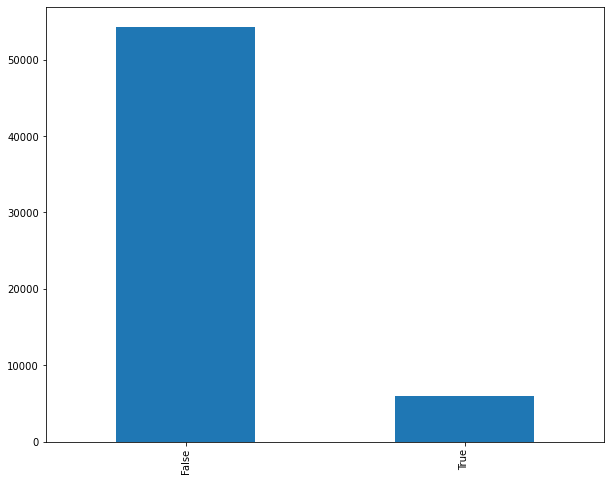

In [126]:
# Let us see the purchase behaviour in general

plt.figure(figsize=(10, 8))

pd.value_counts(gosales['IS_TENT']).plot.bar()

Observations:
- Majority of customers didn't purchase tent
- Few did purchase

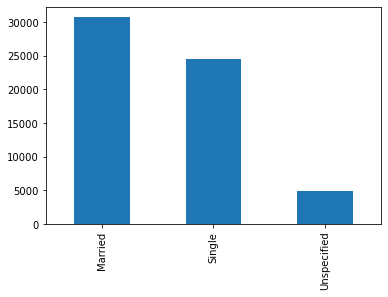

In [127]:
# Let us view the distribution of customers by 'Marital status'

pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()

Observations:
- Many of customers are married
- Some of customers are Single
- Few didn't specify their marital status

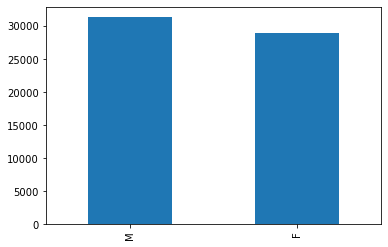

In [128]:
# Let us view the distribution of customers by 'Gender'
pd.value_counts(gosales['GENDER']).plot.bar()

Observations:
- Male and Female ratio is almost equal

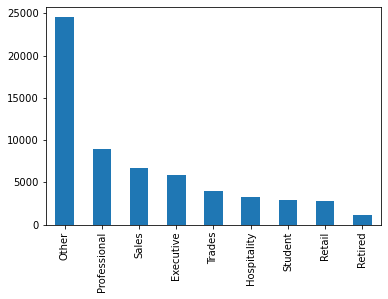

In [129]:
# Let us view the customers based on their 'profession'

pd.value_counts(gosales['PROFESSION']).plot.bar()

Observations:
- Majority of our customers didn't specify their profession
- Others are in the remaining categories

In [130]:
from sklearn import preprocessing

In [131]:
gender = ['M', 'F']

In [132]:
le = preprocessing.LabelEncoder()
gosales['GENDER'] = le.fit_transform(gosales['GENDER'].astype(str))
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
36246,False,1,40,Married,Sales
24533,False,1,41,Single,Other
29973,False,0,28,Married,Other
14136,False,0,29,Single,Student
27924,False,1,53,Married,Retired
6617,False,1,48,Married,Other
17585,False,1,53,Married,Professional
56130,False,1,37,Married,Sales
46503,False,1,40,Married,Retired
4281,False,0,33,Single,Professional


In [133]:
# To view the categories that are encoded
le.classes_

array(['F', 'M'], dtype=object)

Observations:
- F is encoded as 0 and M is encoded as 1
- <font color=red>Label Encoding is fine for conversion of Nominal features with two values i.e. for conversion of two categories into 0 and 1. But for more than two values, it gives scope for model to draw intrinsic order. Bear this in mind.</font>

In [134]:
# Let us do a One-hot encoding for 'Marital Status', 'PROFESSION'

gosales = pd.get_dummies(gosales, columns=['MARITAL_STATUS', 'PROFESSION'])
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
41571,False,0,31,1,0,0,0,0,1,0,0,0,0,0,0
59486,False,0,28,0,1,0,0,0,0,0,1,0,0,0,0
56469,False,0,31,0,1,0,0,0,0,1,0,0,0,0,0
20158,False,1,27,0,1,0,0,0,1,0,0,0,0,0,0
58563,False,0,47,0,0,1,0,1,0,0,0,0,0,0,0
18505,True,1,24,0,1,0,0,0,0,0,0,0,0,0,1
46356,True,1,20,0,1,0,0,0,1,0,0,0,0,0,0
27912,False,1,39,1,0,0,0,0,1,0,0,0,0,0,0
16653,False,0,28,0,1,0,0,0,0,0,1,0,0,0,0
38907,False,1,37,1,0,0,0,0,1,0,0,0,0,0,0


__Discretization of Continuous data__
- We discretize or create bins for a feature when there is no difference in the adjacent values of feature with the label.
- For example, if slight changes in horse power doesn't much change the Mileage, then we group the horse power into bins.

In [135]:
auto_data = pd.read_csv('Data/cars_processed.csv')
auto_data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
59,21.0,4,122.0,86,2226,16.5,1,48
81,28.0,4,98.0,80,2164,15.0,1,48
324,36.4,5,121.0,67,2950,19.9,2,40
177,25.0,4,121.0,115,2671,13.5,2,45
143,28.0,4,90.0,75,2125,14.5,1,46
332,32.4,4,107.0,72,2290,17.0,3,40
142,32.0,4,83.0,61,2003,19.0,3,46
65,11.0,8,429.0,208,4633,11.0,1,48
114,16.0,8,400.0,230,4278,9.5,1,47
376,38.0,4,91.0,67,1965,15.0,3,38


In [136]:
# Let us view the data 

auto_data[['MPG', 'Horsepower']].sort_values(by=['MPG', 'Horsepower']).tail(25)

,MPG,Horsepower
245,36.1,60
242,36.1,66
324,36.4,67
342,37.0,65
369,37.0,68
317,37.0,92
309,37.2,65
301,37.3,69
343,37.7,62
371,38.0,63


Observations:
- For a mileage of 11 the Horsepower was 150 through 210
- For a mileage of 12 the Horsepower was 160 through 225
etc.
- Notice, that there is an overlapp of ranges as we've considered only two features. Let us __assume__ that __for close cluster of Horsepower__ we see __one mileage__ mapped and several such clusters appear __to demonstrate the discretization__ feature.

Let us first fit a model __without discretization__ and notice the accuracy. Later we repeat the same after __discretization__ of Horsepower.

In [137]:
X = auto_data[['Horsepower']]
Y = auto_data['MPG']

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import r2_score

In [139]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
lr = LinearRegression().fit(x_train, y_train)

In [140]:
y_pred = lr.predict(x_test)
y_pred

array([23.247, 25.558, 22.477, 22.477,  6.299, 29.41 , 22.477, 27.099,
       24.48 , 16.314, 25.867, 25.25 , 27.407, 20.936, 28.64 , 27.87 ,
       14.773, 27.715, 20.166, 25.558, 26.637, 29.102, 13.232, 29.102,
       23.247, 28.794, 29.41 , 26.021, 28.64 , 25.096, 27.099, 24.48 ,
       26.483, 22.169, 24.48 , 28.486, 26.483, 28.64 , 17.546, 29.41 ,
       24.018, 17.854, 23.247, 24.788, 25.867, 21.706, 26.483, 27.099,
       29.102, 25.867, 17.084, 24.788, 29.41 , 26.791, 25.867, 11.691,
       30.027, 11.691, 26.329, 25.558, 27.87 , 24.018, 16.314, 28.332,
       29.41 , 25.867, 25.867, 22.477, 24.018, 28.332, 27.099, 25.558,
       24.48 , 16.314, 28.486,  5.528, 27.715, 24.788, 26.021])

In [141]:
print('R square score, before discretization = ', r2_score(y_test, y_pred))

R square score, before discretization =  0.5979243082101799


<font color=red>NOTE - I was tempted to follow above steps of splitting, fit, transform, predict, measure score. I should not! Reason, is if we split data we may get a new set of data and we can't compare results of above and below. So, we need to continue with the above train, test data (which is already split).</font>

In [142]:
# Let us discretize Horsepower

kbd = KBinsDiscretizer(n_bins=20, encode='ordinal')
x_train_binned = kbd.fit_transform(x_train)
x_test_binned = kbd.transform(x_test)

reg = LinearRegression().fit(x_train_binned, y_train)
y_pred = reg.predict(x_test_binned)
y_pred

array([20.549, 23.913, 19.427, 19.427, 12.7  , 32.883, 19.427, 28.398,
       22.791, 14.942, 25.034, 23.913, 28.398, 18.306, 30.64 , 28.398,
       14.942, 28.398, 18.306, 23.913, 27.276, 31.762, 13.821, 31.762,
       20.549, 30.64 , 32.883, 26.155, 30.64 , 23.913, 28.398, 22.791,
       27.276, 19.427, 22.791, 30.64 , 27.276, 30.64 , 17.185, 32.883,
       21.67 , 17.185, 20.549, 22.791, 25.034, 18.306, 27.276, 28.398,
       31.762, 25.034, 16.064, 22.791, 32.883, 27.276, 25.034, 12.7  ,
       32.883, 12.7  , 27.276, 23.913, 28.398, 21.67 , 14.942, 29.519,
       32.883, 25.034, 25.034, 19.427, 21.67 , 29.519, 28.398, 23.913,
       22.791, 14.942, 30.64 , 12.7  , 28.398, 22.791, 26.155])

In [143]:
print('R square score, after discretization = ', r2_score(y_test, y_pred))

R square score, after discretization =  0.7204168218689683


__Note the results__:
    - R square score, before discretization =  0.5979243082101799
    - R square score, after discretization  =  0.7204168218689683

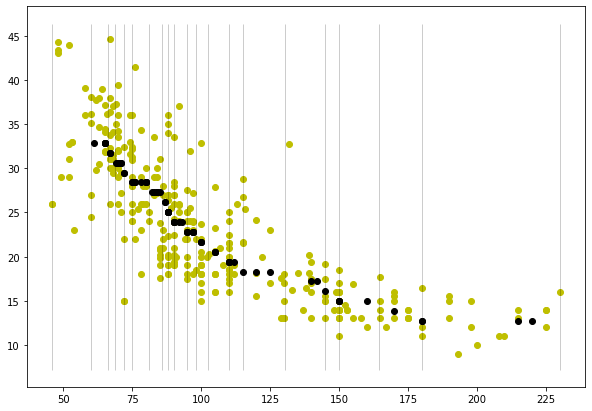

In [144]:
plt.figure(figsize=(10, 7))

plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, c='k')

plt.vlines(kbd.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
plt.show()

Observations:
- __Original training__ data in __greenish yellow__ color
- __test data__ in __black__ color
- __bins__ as the __vertical__ lines